# Comparing two models using non-normalized data

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.style.use('seaborn')
import statsmodels.api as sm
# % get_backend()
from statsmodels.formula.api import ols

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lb_make = LabelEncoder()
gen_ohe = OneHotEncoder()

In [11]:
dd = pd.read_csv("data_cleaned_v1")

In [12]:
dd.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,10/13/2014,221900.0,3,1,1180,5650,1,0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,12/9/2014,538000.0,3,2,2570,7242,2,0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2/25/2015,180000.0,2,1,770,10000,1,0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,3,2487200875,12/9/2014,604000.0,4,3,1960,5000,1,0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2/18/2015,510000.0,3,2,1680,8080,1,0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [13]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21534 entries, 0 to 21533
Data columns (total 22 columns):
Unnamed: 0       21534 non-null int64
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null int64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null int64
waterfront       21534 non-null int64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     17704 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(5), int64(15), object(2)
me

In [14]:
# pd.plotting.scatter_matrix(dn, alpha = 0.3, figsize = (30, 30))
# plt.show()

In [15]:
dn = dd[["bedrooms", "bathrooms", "sqft_living", "floors", "sqft_lot", "sqft_living15", "yr_built", "price", "id"]]
dn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21534 entries, 0 to 21533
Data columns (total 9 columns):
bedrooms         21534 non-null int64
bathrooms        21534 non-null int64
sqft_living      21534 non-null int64
floors           21534 non-null int64
sqft_lot         21534 non-null int64
sqft_living15    21534 non-null int64
yr_built         21534 non-null int64
price            21534 non-null float64
id               21534 non-null int64
dtypes: float64(1), int64(8)
memory usage: 1.5 MB


In [16]:
dn.head()

,bedrooms,bathrooms,sqft_living,floors,sqft_lot,sqft_living15,yr_built,price,id
0,3,1,1180,1,5650,1340,1955,221900.0,7129300520
1,3,2,2570,2,7242,1690,1951,538000.0,6414100192
2,2,1,770,1,10000,2720,1933,180000.0,5631500400
3,4,3,1960,1,5000,1360,1965,604000.0,2487200875
4,3,2,1680,1,8080,1800,1987,510000.0,1954400510


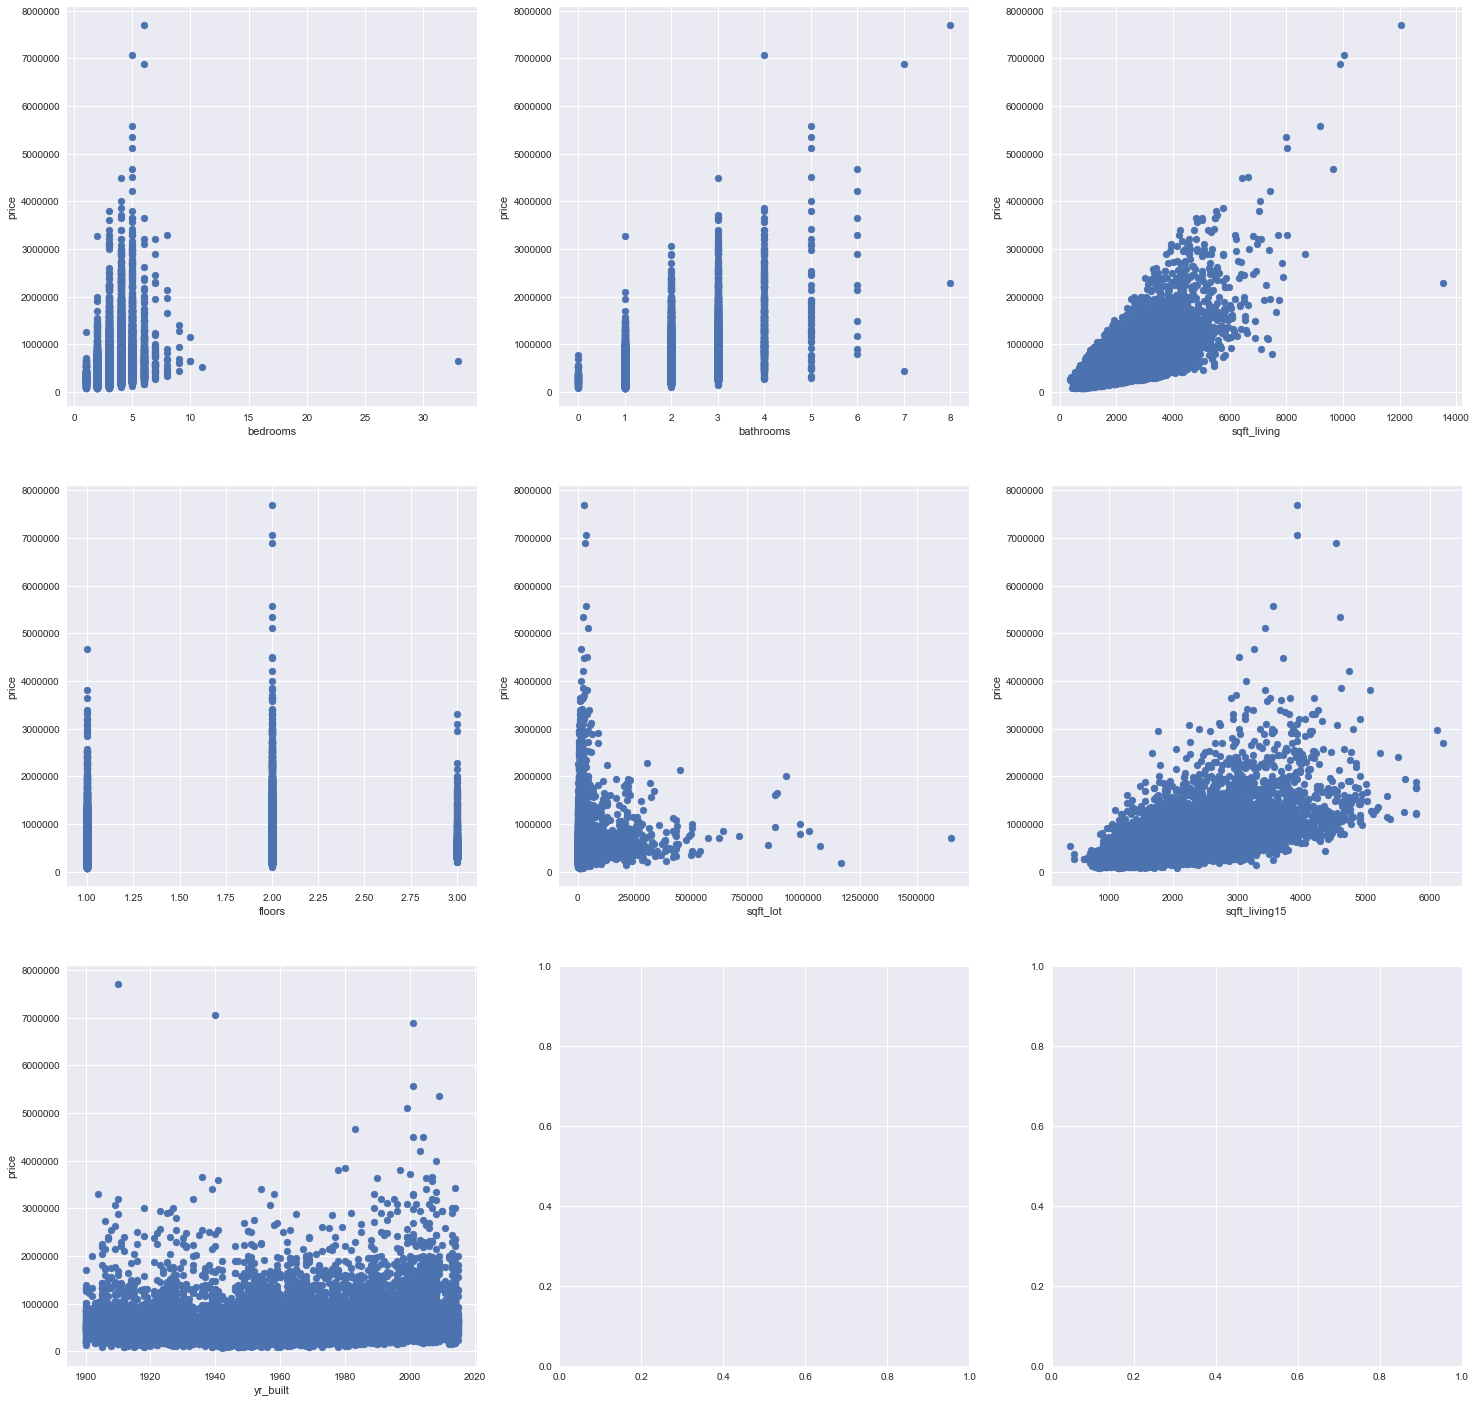

In [17]:
fig, axes = plt.subplots(3, 3, figsize = (25 , 25))

for i, axe in enumerate(axes.flatten()):
    if i > 6:
        break
    else:
        col = dn.columns[i]
        axe.scatter(dn[col], dn["price"])
        axe.set_xlabel(col)
        axe.set_ylabel("price")

The most linear candidates are sqrft_living and sqrft_living15, which tells us about the sizes of the houses in the neighborhood. We'll look at each parameter's relationship.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


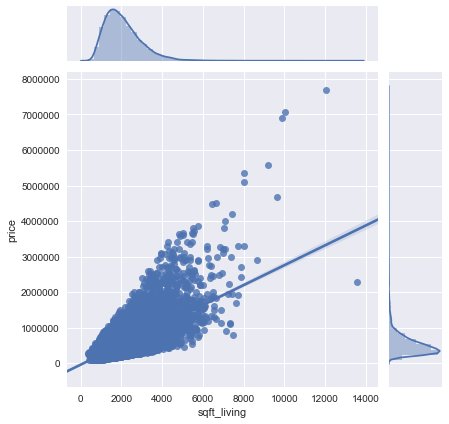

In [18]:
sns.jointplot(x = dn.sqft_living, y = dn.price, data = dn, kind = 'reg')

In [19]:
f1 = "price~sqft_living"

In [20]:
model_1 = ols(formula = f1, data = dn).fit()

In [21]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.087e+04
Date:                Wed, 17 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:10:22   Log-Likelihood:            -2.9912e+05
No. Observations:               21534   AIC:                         5.982e+05
Df Residuals:                   21532   BIC:                         5.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.215e+04   4404.521     -9.570      0.000   -5.08e+04   -3.35e+04
sqft_living   279.9321      1.938    144.473      0.000     276.134     283.730
==============================================================================
Omnibus:                    14582.265   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           516142.289
Skew:                           2.781   Prob(JB):                         0.00
Kurtosis:                      26.331   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
model_1.params

Intercept     -42152.946806
sqft_living      279.932115
dtype: float64

In [ ]:
model

In [26]:
model_1.params.Intercept

-42152.946805628926

In [27]:
model_1.params.sqft_living

279.9321153547885

In [28]:
model_1.params.coefficient

AttributeError: 'Series' object has no attribute 'coefficient'

In [ ]:

def best_fit_line(model):
    line = model.params.Intercept + " y " + 

In [29]:
def dummy_super(x):
    n = np.random.randint(0,10)
    def subfunc(x, n):
        print(x + " argument " + n + " times")
    return subfunc

In [32]:
dummy_super("yeah!")

<function __main__.dummy_super.<locals>.subfunc(x, n)>

In [33]:
a = [(1,4), (9,3)]


In [5]:
fig = plt.figure(figsize=(20,20))
fig = sm.graphics.plot_regress_exog(model_1, "sqft_living", fig=fig)
plt.show()

NameError: name 'model_1' is not defined

<Figure size 1440x1440 with 0 Axes>

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


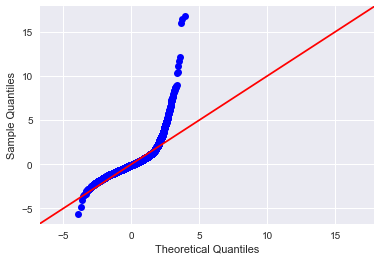

In [16]:
import scipy.stats as stats
residuals = model_1.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Now we look at sqft_living15 relationship:

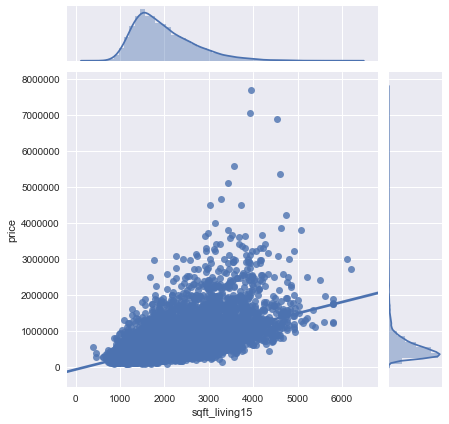

In [17]:
sns.jointplot(x = dn.sqft_living15, y = dn.price, data = dn, kind = 'reg')

In [18]:
f2 = "price~sqft_living15"

In [19]:
model_2 = ols(formula = f2, data = dn).fit()

In [20]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                 1.122e+04
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:21:18   Log-Likelihood:            -3.0190e+05
No. Observations:               21534   AIC:                         6.038e+05
Df Residuals:                   21532   BIC:                         6.038e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.111e+04   6203.217    -13.076      0.000   -9.33e+04    -6.9e+04
sqft_living15   312.7273      2.952    105.926      0.000     306.941     318.514
==============================================================================
Omnibus:                    19927.343   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1851998.034
Skew:                           4.158   Prob(JB):                         0.00
Kurtosis:                      47.664   Cond. No.                     6.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

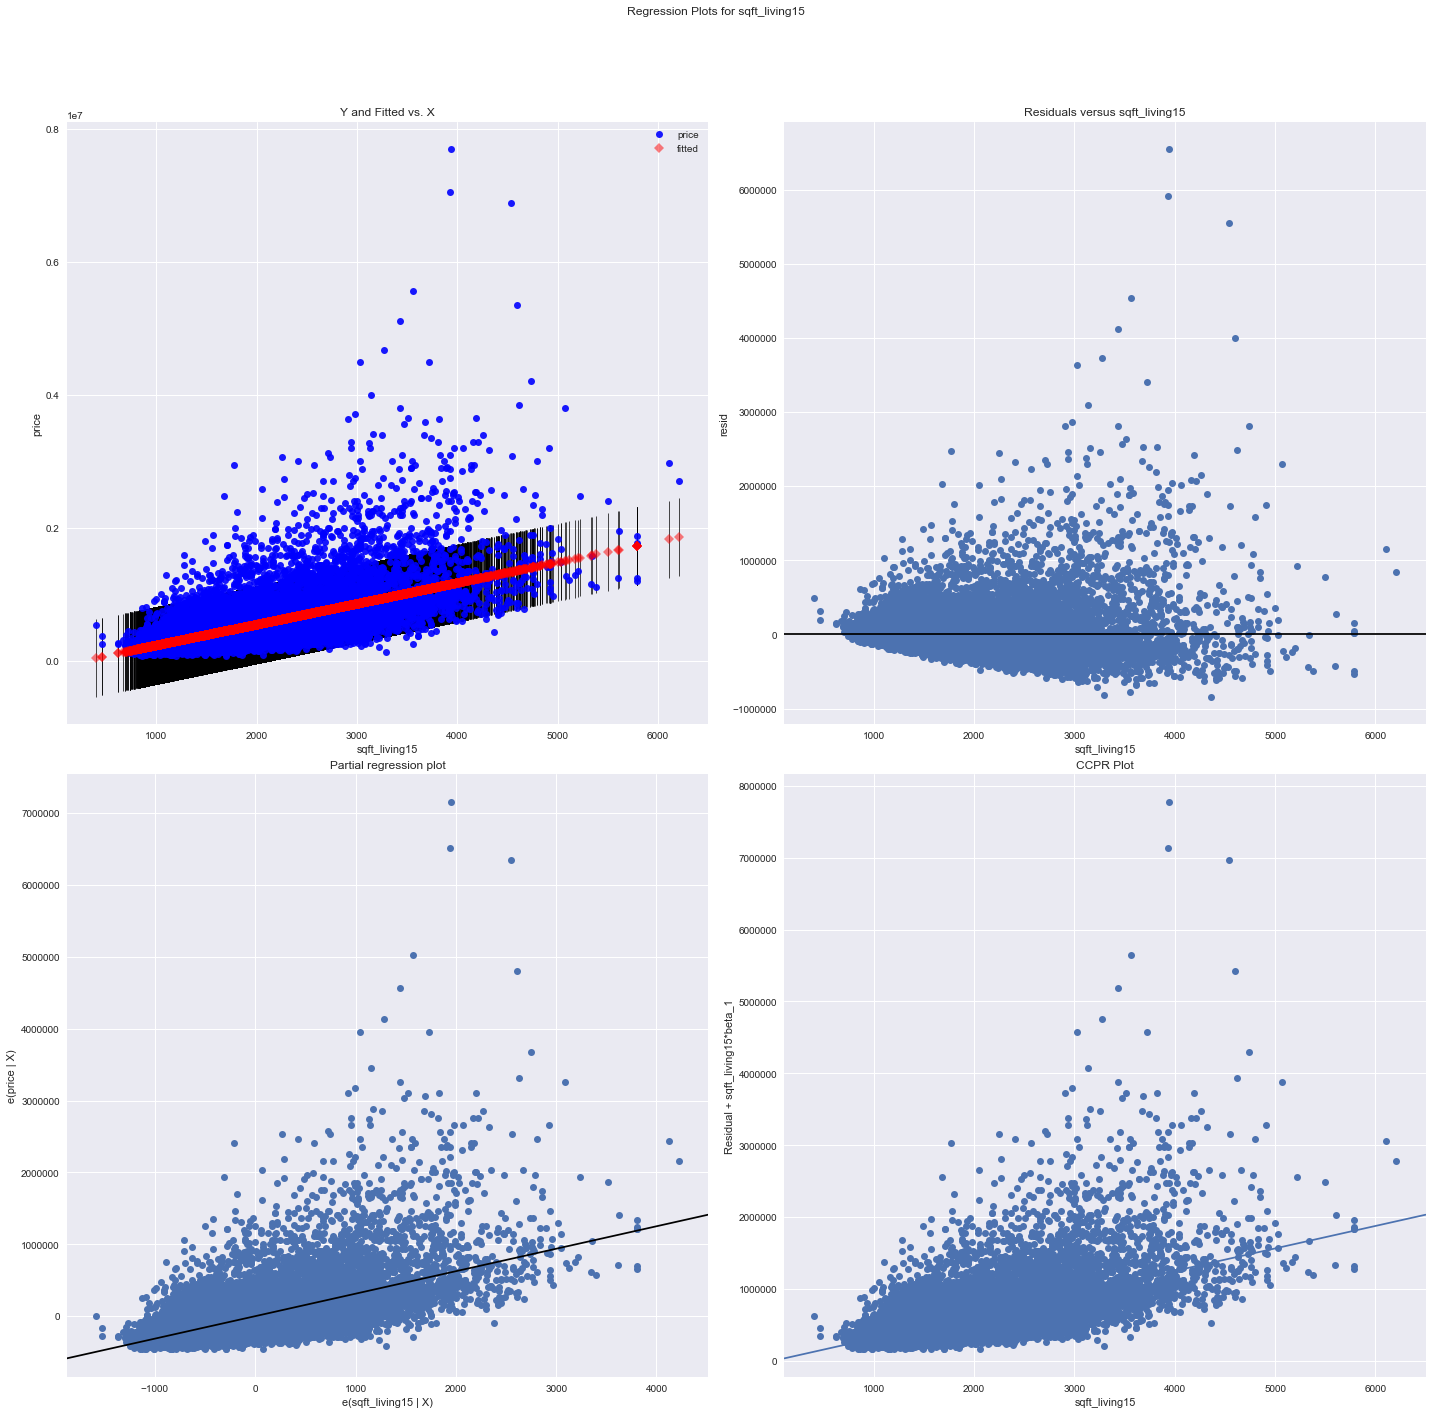

In [21]:
fig = plt.figure(figsize=(20,20))
fig = sm.graphics.plot_regress_exog(model_2, "sqft_living15", fig=fig)
plt.show()

In [24]:
dn.corr()["price"]

bedrooms         0.308063
bathrooms        0.509418
sqft_living      0.701587
floors           0.237626
sqft_lot         0.090338
sqft_living15    0.585304
yr_built         0.054273
price            1.000000
id              -0.017392
Name: price, dtype: float64

In [25]:
dn.corr()

,bedrooms,bathrooms,sqft_living,floors,sqft_lot,sqft_living15,yr_built,price,id
bedrooms,1.000000,0.465820,0.577934,0.157759,0.032735,0.392874,0.155462,0.308063,0.000991
bathrooms,0.465820,1.000000,0.698036,0.486248,0.086838,0.510135,0.435004,0.509418,-0.000266
sqft_living,0.577934,0.698036,1.000000,0.353090,0.173768,0.756208,0.318217,0.701587,-0.012381
floors,0.157759,0.486248,0.353090,1.000000,-0.008927,0.296008,0.578567,0.237626,0.019118
sqft_lot,0.032735,0.086838,0.173768,-0.008927,1.000000,0.145142,0.052646,0.090338,-0.132061
sqft_living15,0.392874,0.510135,0.756208,0.296008,0.145142,1.000000,0.326539,0.585304,-0.002707
yr_built,0.155462,0.435004,0.318217,0.578567,0.052646,0.326539,1.000000,0.054273,0.021609
price,0.308063,0.509418,0.701587,0.237626,0.090338,0.585304,0.054273,1.000000,-0.017392
id,0.000991,-0.000266,-0.012381,0.019118,-0.132061,-0.002707,0.021609,-0.017392,1.000000
